In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
mdf = pd.read_csv('student-mat.csv', sep=';')

In [3]:
pdf = pd.read_csv('student-por.csv', sep=';')

In [4]:
mdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
print(mdf.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [6]:
mdfm = mdf[mdf['sex'] == 'M']
mdff = mdf[mdf['sex'] == 'F']

In [7]:
pdfm = pdf[pdf['sex'] == 'M']
pdff = pdf[pdf['sex'] == 'F']

In [8]:
selected_columns = ['Pstatus', 'Medu', 'Fedu', 'traveltime', 'famsup', 'address', 'internet', 'famrel', 'health', 'absences', 'freetime', 'goout', 'failures', 'paid', 'G3']

In [9]:
mdfm = mdfm[selected_columns]
pdfm = pdfm[selected_columns]
mdff = mdff[selected_columns]
pdff = pdff[selected_columns]

In [10]:
mdfm.head()

,Pstatus,Medu,Fedu,traveltime,famsup,address,internet,famrel,health,absences,freetime,goout,failures,paid,G3
5,T,4,3,1,yes,U,yes,5,5,10,4,2,0,yes,15
6,T,2,2,1,no,U,yes,4,3,0,4,4,0,no,11
8,A,3,2,1,yes,U,yes,4,1,0,2,2,0,yes,19
9,T,3,4,1,yes,U,yes,5,5,0,5,1,0,yes,15
12,T,4,4,1,yes,U,yes,4,5,2,3,3,0,yes,14


In [11]:
binary_mappings = {
    'Pstatus': {'T': 1, 'A': 0},
    'famsup': {'yes': 1, 'no': 0},
    'address': {'U': 1, 'R': 0},
    'internet': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0}
}

datasets = [mdfm, mdff, pdfm, pdff]

for dataset in datasets:
    for column, mapping in binary_mappings.items():
        dataset[column] = dataset[column].map(mapping).fillna(0).astype(int)

In [12]:
mdfm.head()

,Pstatus,Medu,Fedu,traveltime,famsup,address,internet,famrel,health,absences,freetime,goout,failures,paid,G3
5,1,4,3,1,1,1,1,5,5,10,4,2,0,1,15
6,1,2,2,1,0,1,1,4,3,0,4,4,0,0,11
8,0,3,2,1,1,1,1,4,1,0,2,2,0,1,19
9,1,3,4,1,1,1,1,5,5,0,5,1,0,1,15
12,1,4,4,1,1,1,1,4,5,2,3,3,0,1,14


In [13]:
for dataset in [mdfm, mdff, pdfm, pdff]:
    dataset['Pedu'] = dataset['Medu'] + dataset['Fedu']
    dataset.drop(columns=['Medu', 'Fedu'], inplace=True)

In [14]:
mdfm['category'] = 1
pdfm['category'] = 2
mdff['category'] = 3
pdff['category'] = 4

In [15]:
fulldf = pd.concat([mdfm, pdfm, mdff, pdff], ignore_index=True)

<Axes: xlabel='Pedu', ylabel='G3'>

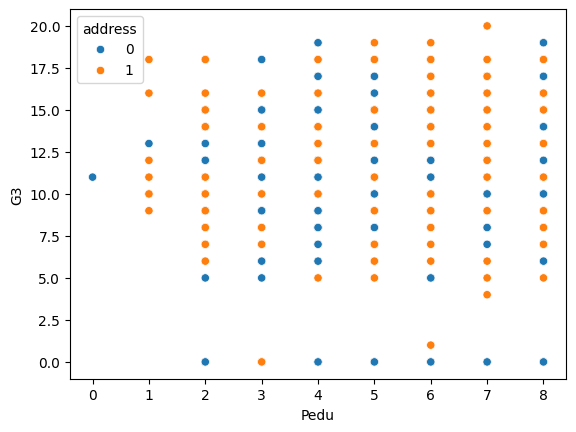

In [16]:
sns.scatterplot(x='Pedu', y='G3', hue='address', data=fulldf)

<Axes: >

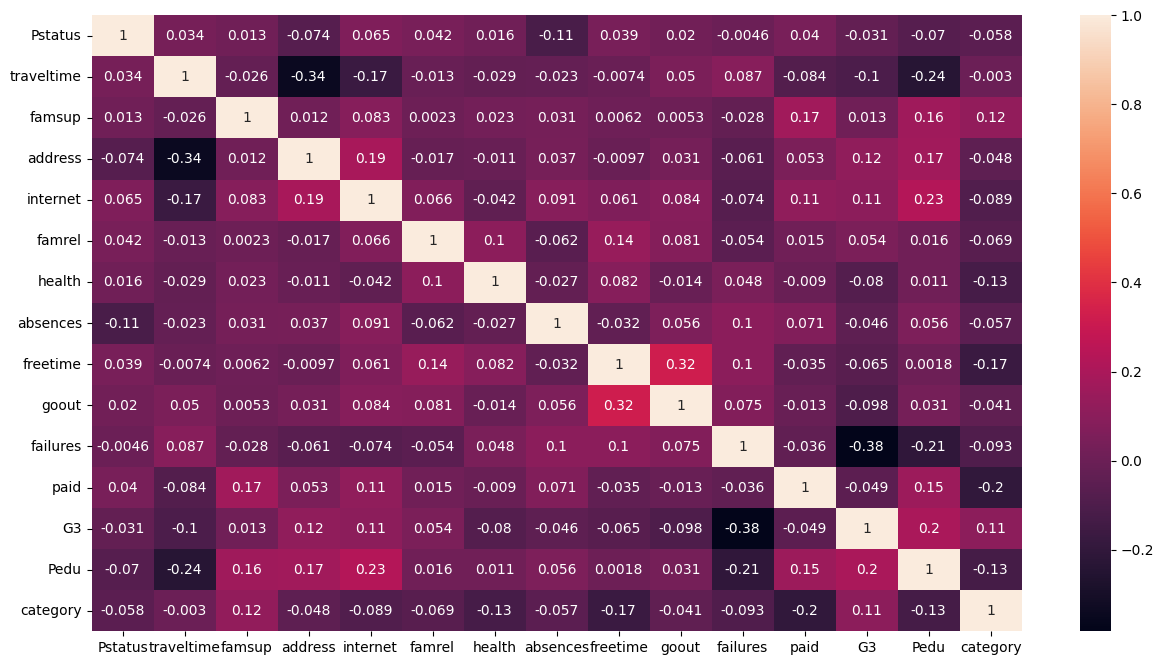

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(fulldf.corr(numeric_only= True),annot = True)

In [18]:
X = fulldf[['Pedu','failures','goout','freetime','absences','internet', 'paid']]

In [19]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<Axes: xlabel='0', ylabel='1'>

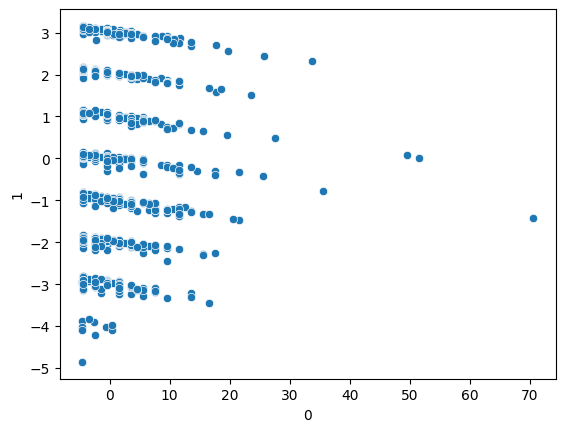

In [20]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<Axes: xlabel='0', ylabel='1'>

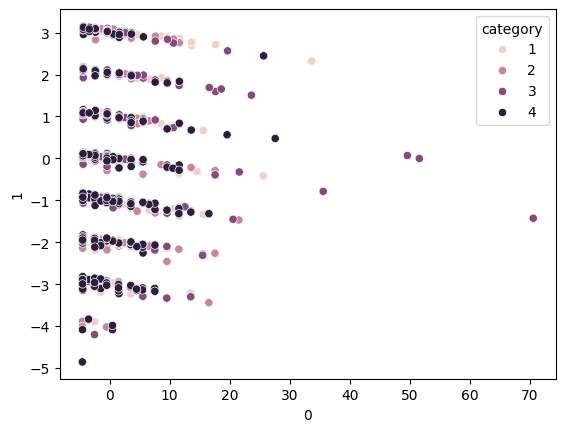

In [21]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=fulldf.category)

Text(0, 0.5, 'Variance')

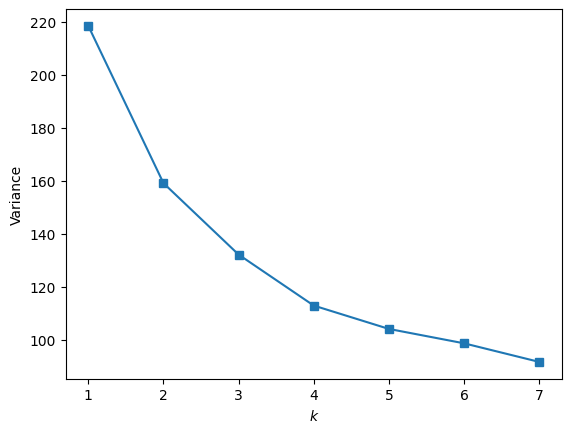

In [22]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

<Axes: xlabel='0', ylabel='1'>

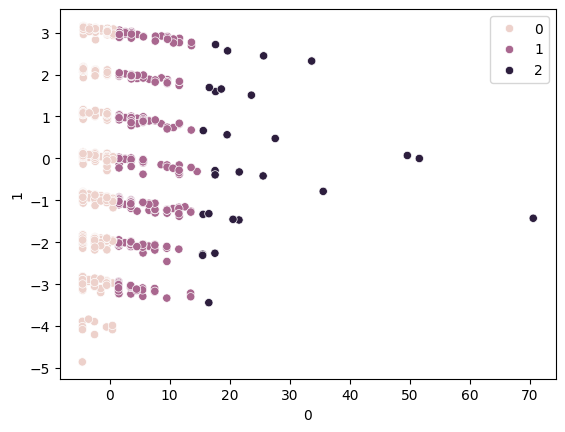

In [23]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
y = kmeans.fit_predict(X)
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [24]:
ydf = pd.DataFrame(y, columns=['Cluster'])
finaldf = pd.concat([fulldf, ydf], axis=1)

In [25]:
gradeanalysis = finaldf.groupby('Cluster')['G3'].mean()
print(gradeanalysis)

Cluster
0    11.404402
1    11.255172
2    10.592593
Name: G3, dtype: float64


In [26]:
import plotly.express as px

In [27]:
fig = px.scatter(pd.concat([finaldf, pca_df], axis = 1),
                 x = 0, y = 1, color='Cluster', hover_data=['category','G3'])
fig.show()